# < Notebook >

## 1. DEED 

Preprocessing the raw data based on THINGS EEG preprocessing method

In [ ]:
import os
import scipy
import numpy as np
import mne

In [15]:
# Get basic information of example DEED dream raw data #
project_dir = os.path.join('D:/', 'UG', 'Research', 'Dream_Neural_Decoding', 'Shannon_Big_Big_Dream_Project', 'project_directory')
eeg_dir = os.path.join('eeg_dataset', 'dream_data', 'DEED', 'dream_raw_data', '021') 
file_path = os.path.join(project_dir, eeg_dir)
data = scipy.io.loadmat(file_path)

FileNotFoundError: [Errno 2] No such file or directory: 'D:/UG\\Research\\Dream_Neural_Decoding\\Shannon_Big_Big_Dream_Project\\project_directory\\eeg_dataset\\dream_data\\DEED\\dream_raw_data\\021.mat'

In [ ]:
print(data.keys())
print('')
print("The header is:", data['__header__'])
print('')
print("The version is:", data['__version__'])
print('')
print("The globals is:", data['__globals__'])
print('')
print("The shape of data is:", mat["Data"].shape)

dict_keys(['__header__', '__version__', '__globals__', 'Data'])

The header is: b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Wed Jun  8 18:27:24 2022'

The version is: 1.0

The globals is: []

The shape of data is: (6, 186800)


In [ ]:
# Convert to MNE raw format
eeg_data = mat["Data"]*10**-7 
info = mne.create_info(ch_names=['F3','F4','FT7','FT8','T7','T8'], sfreq=200, 
                   ch_types=['eeg','eeg','eeg','eeg','eeg','eeg'])
raw = mne.io.RawArray(eeg_data, info)
del eeg_data

Creating RawArray with float64 data, n_channels=6, n_times=186800
    Range : 0 ... 186799 =      0.000 ...   933.995 secs
Ready.


In [ ]:
# Create events ane epochs
dream_onset_time = raw.times[0]
dream_onset_duration = raw.times[1]
annotation = 'dream_onset' 
raw.set_annotations(mne.Annotations(dream_onset_time, dream_onset_duration, annotation))

events, event_id = mne.events_from_annotations(raw)  
print("Event ID:", event_id)
print('')
epochs = mne.Epochs(raw, events, tmin=0, tmax=raw.times[-1], baseline=(0,0),
			preload=True)

Used Annotations descriptions: ['dream_onset']
Event ID: {'dream_onset': 1}

Not setting metadata
1 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 1 events and 186800 original time points ...
0 bad epochs dropped


In [ ]:
epoched_data = epochs.get_data()
print(epoched_data.shape)
ch_names = epochs.info['ch_names']
times = epochs.times

(1, 6, 186800)


In [ ]:
print(times.shape)

(186800,)


### Covariance matrix

In [ ]:
from sklearn.discriminant_analysis import _cov
import numpy as np
X=np.array([[-7.72550885e-09, -3.94386708e-08, 5.53948739e-08, -2.44893271e-08,
   5.53547354e-08, 5.24697319e-09]])
X=np.reshape(X,(1,6,1))
X

array([[[-7.72550885e-09],
        [-3.94386708e-08],
        [ 5.53948739e-08],
        [-2.44893271e-08],
        [ 5.53547354e-08],
        [ 5.24697319e-09]]])

In [ ]:
cov = _cov(X[:,:,0])

In [ ]:
cov

array([[0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]])

In [ ]:
import numpy as np

whitened_train = []
session_data = np.random.rand(10, 4, 6, 100) 
sigma_inv = np.random.rand(6,6)

W = np.reshape(session_data, (-1,session_data.shape[2],session_data.shape[3])).swapaxes(1, 2)
print(W.shape)
X = (W @ sigma_inv).swapaxes(1, 2)
print(X.shape)
Y = np.reshape(X, session_data.shape)
print(Y.shape)
whitened_train.append(Y)

(40, 100, 6)
(40, 6, 100)
(10, 4, 6, 100)


### Check the preprocessing errors

In [ ]:
import os
project_dir = os.path.join('D:/', 'UG', 'Research', 'Dream_Neural_Decoding',
                           'Shannon_Big_Big_Dream_Project','project_directory')
raw_dir = os.path.join('eeg_dataset', 'dream_data', 'raw_data', 'DEED', 'raw_mat') 
prepr_dir = os.path.join('eeg_dataset', 'dream_data', 'preprocessed_data', 'DEED') 

raw_names = os.listdir(os.path.join(project_dir, raw_dir))
prepr_names = os.listdir(os.path.join(project_dir, prepr_dir))

problem_files = sorted(list(set(raw_names)^set(prepr_names)))
print(problem_files)
print(len(problem_files))

['313', '315', '318', '330', '333', '335', '337', '338', '352', '354', '355', '358', '360', '368', '375', '395', '398', '402', '410', '417', '435', '439', '440', '441']
24


In [ ]:
# import os
# project_dir = os.path.join('D:/', 'UG', 'Research', 'Dream_Neural_Decoding',
#                            'Shannon_Big_Big_Dream_Project','project_directory')
# raw_dir = os.path.join('eeg_dataset', 'dream_data', 'raw_data', 'DEED', 'raw_mat') 
# prepr_dir = os.path.join('eeg_dataset', 'dream_data', 'preprocessed_data', 'DEED') 

# ### Rename all the raw files ###
# filenames = os.listdir(os.path.join(project_dir, raw_dir))
# for filename in filenames: 
#     new_filename = filename[0:8]+'-115043'
#     old_file_path = os.path.join(project_dir, raw_dir, filename)
#     new_file_path = os.path.join(project_dir, raw_dir, new_filename)
#     os.rename(old_file_path, new_file_path)

In [ ]:
import os
import mne
import numpy as np
import scipy
import pandas as pd    
import datetime

project_dir = os.path.join('D:/', 'UG', 'Research', 'Dream_Neural_Decoding',
                           'Shannon_Big_Big_Dream_Project','project_directory')
DEED_dir = os.path.join('eeg_dataset', 'dream_data', 'raw_data', 'DEED') 
eeg_dir = os.path.join(DEED_dir, 'raw_mat')        

### Load the metadata and eeg data ###
f1 = pd.read_excel(os.path.join(project_dir, DEED_dir,'Status_identification_of_each_stage_of_EEG.xlsx'))
f2 = pd.read_excel(os.path.join(project_dir, DEED_dir,'Emotional_ratings_excel_filesfiles.xlsx'))

PSG_number ='00000375-115043'

raw_data = scipy.io.loadmat(os.path.join(project_dir, eeg_dir, PSG_number))

### Convert to MNE raw format ###
eeg_data = raw_data["Data"]*10**-7 # rescale
del raw_data
ch_names=['F3','F4','FT7','FT8','T7','T8','RF']
sfreq=200
info = mne.create_info(ch_names=ch_names, sfreq=sfreq, 
                ch_types=['eeg','eeg','eeg','eeg','eeg','eeg','eeg'])
raw = mne.io.RawArray(eeg_data, info)
raw.set_eeg_reference(ref_channels=['RF'])
raw.drop_channels(ch_names='RF')
del eeg_data 

# Set measurement time #
for index, row in f1.iterrows():
    psg_number = row['PSG_number']
    if psg_number == PSG_number:
        date = str(f1.loc[index, 'Date'])
        exp_onset = f1.loc[index, 'Start_recording'] 
        break
        print(date)
measurement_time = pd.Timestamp(f'{date[0:4]}-{date[4:6]}-{date[6:8]} {exp_onset}')
raw.set_meas_date(measurement_time.timestamp())

### Create events ###
# Create dream onsets and ends timestamps #
dream_onsets = []
dream_ends = []
f2['PSG_number'] = f2['PSG_number'].ffill()
for index, row in f2.iterrows():
    psg_number = str(row['PSG_number'])
    if psg_number == PSG_number:
        if not isinstance(, datetime.time):
            pass
        else: 
            print(date)
            print(f2.loc[index, "REM_period_start_time"])
            # dream_onset = pd.Timestamp(
            #     f'{date[0:4]}-{date[4:6]}-{date[6:8]} {f2.loc[index, "REM_period_start_time"]}') + pd.Timedelta(days=1)
            # dream_end = pd.Timestamp(
            #     f'{date[0:4]}-{date[4:6]}-{date[6:8]} {f2.loc[index, "End_time_of_REM_period"]}') + pd.Timedelta(days=1)
            # dream_onsets.append(dream_onset)
            # dream_ends.append(dream_end)
# dream_onset_sec = [(i - measurement_time).total_seconds() for i in dream_onsets]
# dream_dur_sec = [(f - i).total_seconds() for i, f in zip(dream_onsets,dream_ends)]
# print(dream_dur_sec)

# # Create events #
# events = [[int(x), 0, 1] for x in dream_onset_sec]
# print(events[0])

# ### Create epochs and get outputs ###
# for i, tmax in enumerate(dream_dur_sec):
#     epoch = mne.Epochs(raw, np.reshape(events[i],(1,3)), tmin=0, 
#                     tmax=tmax, baseline=(0,0), preload=True) 

#     # Resampling
#     if args.sfreq < 200:
#         epoch.resample(args.sfreq)

#     # Ouput #
#     epoched_data = []
#     times = []
#     epoched_data.append(epoch.get_data())
#     ch_names = epoch.info['ch_names']
#     times.append(epoch.times)
#     del epoch
#     del raw

Creating RawArray with float64 data, n_channels=7, n_times=9464600
    Range : 0 ... 9464599 =      0.000 ... 47322.995 secs
Ready.
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
<class 'datetime.time'>
<class 'datetime.time'>
<class 'datetime.time'>
<class 'datetime.time'>
<class 'datetime.time'>
<class 'str'>


## 2. THINGS 

### Create raw file

In [17]:
import os
import mne
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
from sklearn.utils import shuffle

In [2]:
### Loop across data collection sessions ###
epoched_data = []
img_conditions = []

### Load the EEG data and convert it to MNE raw format ###
project_dir = os.path.join('D:/', 'UG', 'Research', 'Dream_Lab', 'Dream_Decoding','project_directory')

In [3]:
sub = 1

In [4]:
eeg_dir = os.path.join('eeg_dataset', 'wake_data', 'THINGS', 'raw_data', 
                       'sub-'+ format(sub,'02'), 'ses-01', 'raw_eeg_'+ 'training' +'.npy')
eeg_data = np.load(os.path.join(project_dir, eeg_dir), allow_pickle=True).item()

ch_names = eeg_data['ch_names']
sfreq = eeg_data['sfreq']
print('sfreq: ', sfreq)
ch_types = eeg_data['ch_types']

eeg_data = eeg_data['raw_eeg_data']

# Convert to MNE raw format
info = mne.create_info(ch_names, sfreq, ch_types)
raw = mne.io.RawArray(eeg_data, info)
del eeg_data

### Get events, drop unused channels and reject target trials ###
events = mne.find_events(raw, stim_channel='stim')

# Select only occipital (O) and posterior (P) channels
chan_idx = np.asarray(mne.pick_channels_regexp(raw.info['ch_names'],'^O *|^P *'))
new_chans = [raw.info['ch_names'][c] for c in chan_idx]
raw.pick_channels(new_chans)

sfreq:  1000
Creating RawArray with float64 data, n_channels=64, n_times=5450560
    Range : 0 ... 5450559 =      0.000 ...  5450.559 secs
Ready.
16800 events found
Event IDs: [    1     2     3 ... 16529 16530 99999]
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


<RawArray | 17 x 5450560 (5450.6 s), ~707.0 MB, data loaded>

In [5]:
# Reject the target trials (event 99999)
idx_target = np.where(events[:,2] == 99999)[0]
events = np.delete(events, idx_target, 0)

# Highpass lowpass filter 0.2Hz 200Hz / Bandpass filter: mne.filter()
h_freq, l_freq = 0.2, 200
raw = raw.copy().filter(h_freq, l_freq, fir_design='firwin', n_jobs = -1)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.2 - 2e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.20
- Lower transition bandwidth: 0.20 Hz (-6 dB cutoff frequency: 0.10 Hz)
- Upper passband edge: 200.00 Hz
- Upper transition bandwidth: 50.00 Hz (-6 dB cutoff frequency: 225.00 Hz)
- Filter length: 16501 samples (16.501 s)



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    9.9s
[Parallel(n_jobs=-1)]: Done  14 out of  17 | elapsed:   11.2s remaining:    2.3s
[Parallel(n_jobs=-1)]: Done  17 out of  17 | elapsed:   11.8s finished


In [6]:
raw

<RawArray | 17 x 5450560 (5450.6 s), ~707.0 MB, data loaded>

Using matplotlib as 2D backend.


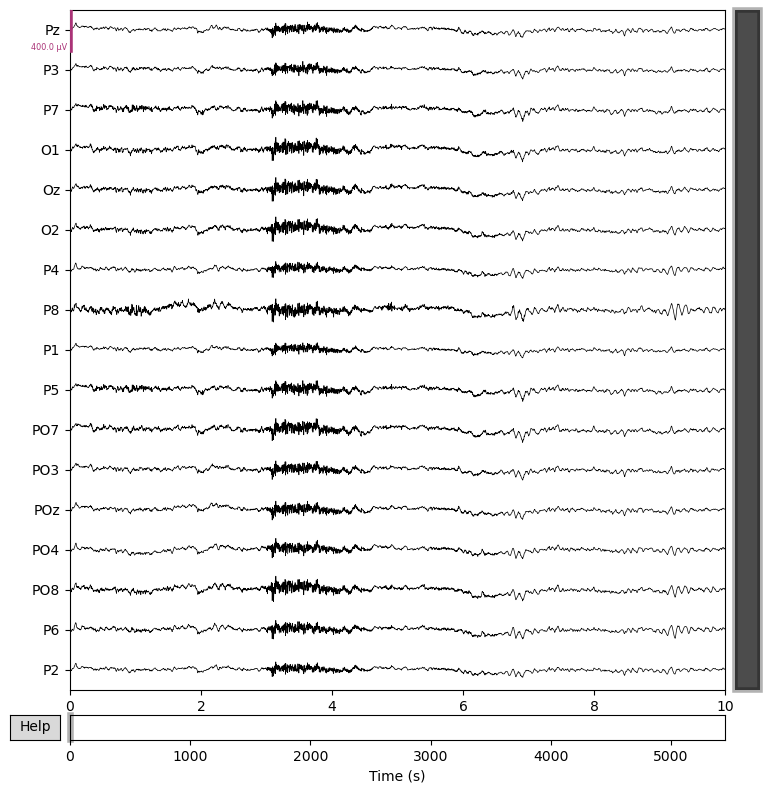

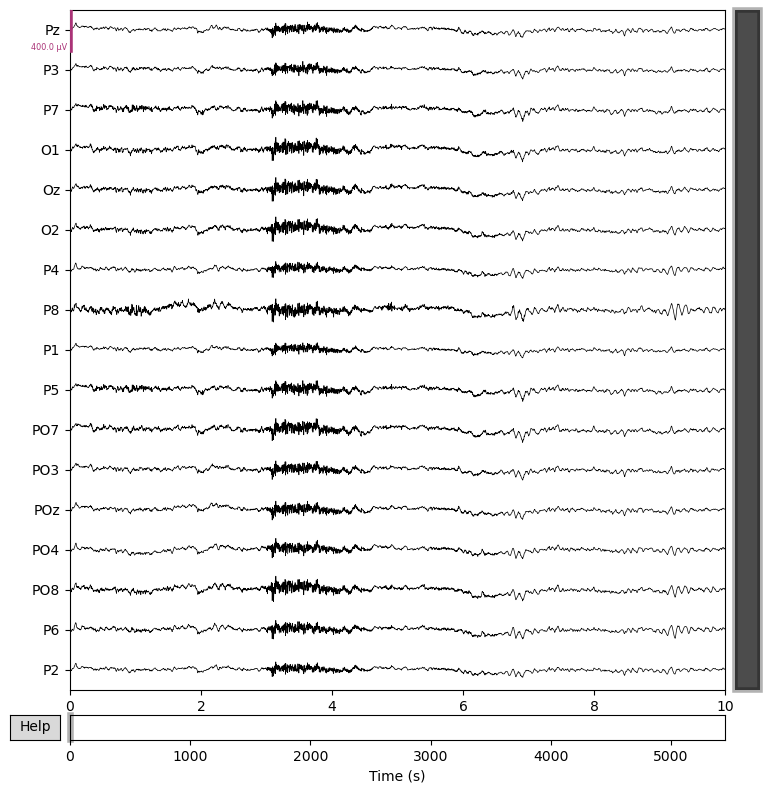

In [7]:
raw.plot(scalings={'eeg': 2e-4})

In [8]:
raw_data = raw.get_data()
zscored_data = sc.stats.zscore(raw_data, axis=0) 
# axis=0 is getting zscore across time courses
raw_zscored = mne.io.RawArray(zscored_data, info=raw.info)

Creating RawArray with float64 data, n_channels=17, n_times=5450560
    Range : 0 ... 5450559 =      0.000 ...  5450.559 secs
Ready.


In [9]:
raw_data.shape

(17, 5450560)

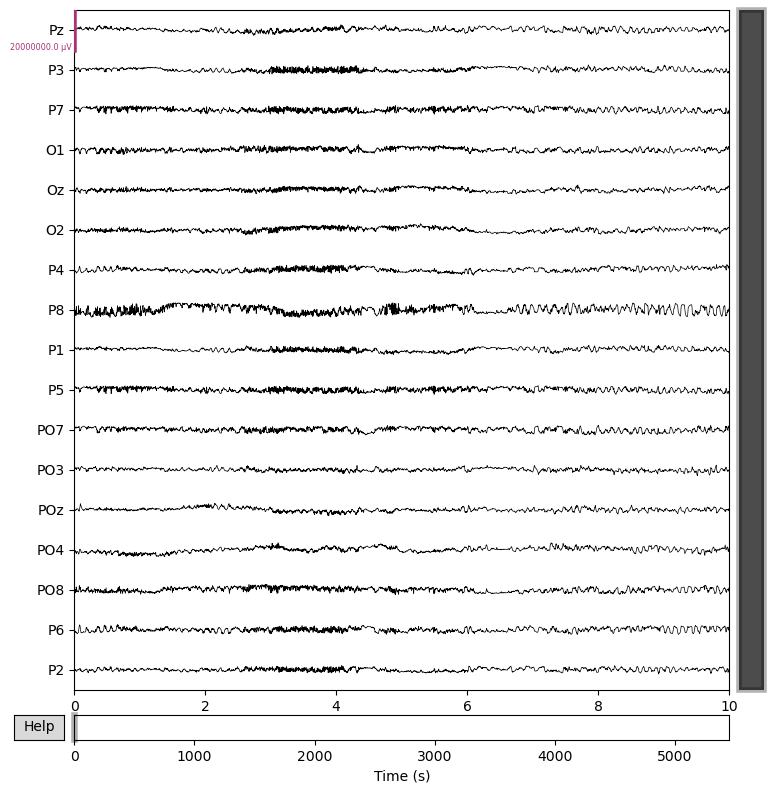

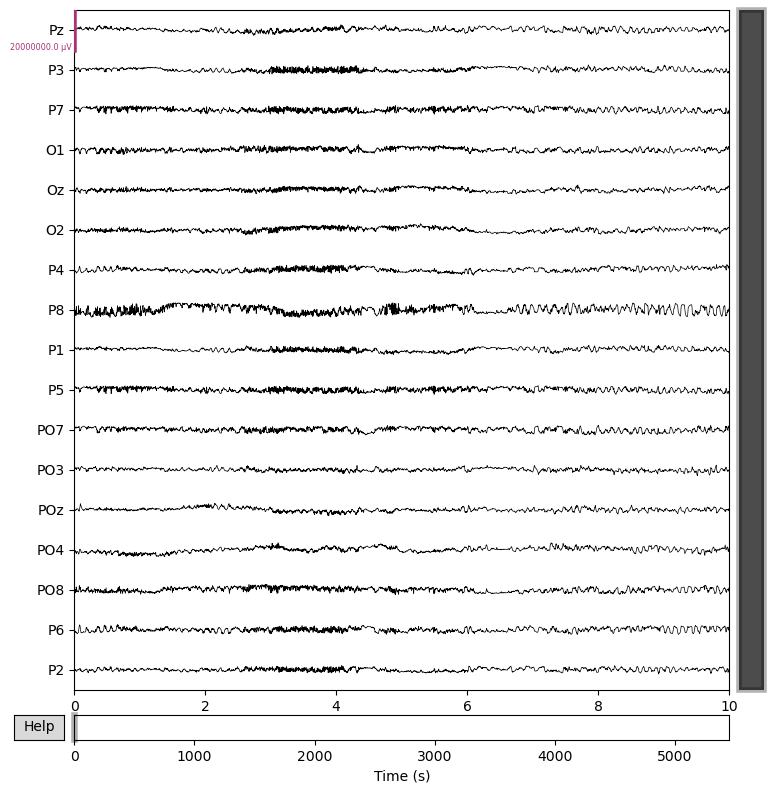

In [10]:
raw_zscored.plot(scalings={'eeg': 10})

In [11]:
### Epoching, baseline correction and resampling ###
epochs = mne.Epochs(raw_zscored, events, tmin=-.2, tmax=.8,
    preload=True)
inteval = (-0.2, 0)
epochs = epochs.apply_baseline(inteval)

# Resampling
epochs.resample(100)
ch_names = epochs.info['ch_names']
times = epochs.times

### Sort the data ###
data = epochs.get_data()
events = epochs.events[:,2]
img_cond = np.unique(events)
del epochs

Not setting metadata
16710 matching events found
Setting baseline interval to [-0.2, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 16710 events and 1001 original time points ...
0 bad epochs dropped
Applying baseline correction (mode: mean)


In [12]:
data.shape

(16710, 17, 100)

In [13]:
# average across images
data_mean = np.mean(data, axis=0)

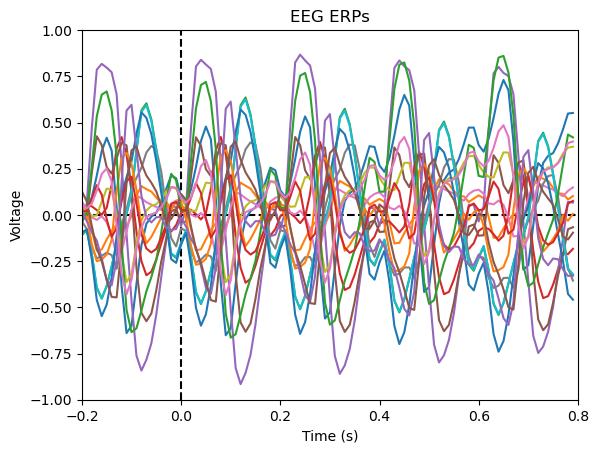

In [14]:
plt.figure()
plt.plot([-.2, .8], [0, 0], 'k--', [0, 0], [-1,1], 'k--')
plt.plot(times, np.transpose(data_mean))
plt.xlabel('Time (s)')
plt.xlim(left=-.2, right=.8)
plt.ylabel('Voltage')
plt.ylim(bottom=-1, top=1)
plt.title('EEG ERPs')
plt.show()

In [19]:
data_part = 'training'
seed = 2003

### Loading preprocessed data

In [29]:
THINGS_prepr_dir = os.path.join('eeg_dataset', 'wake_data', 'THINGS', 'preprocessed_data','occipital',
                                'sub-'+format(sub,'02'), 'preprocessed_eeg_training.npy')
THINGS_eeg_data = np.load(os.path.join(project_dir, THINGS_prepr_dir), allow_pickle=True).item()

In [30]:
THINGS_eeg_data.keys()

dict_keys(['preprocessed_eeg_data', 'ch_names', 'times'])

In [31]:
THINGS_eeg_data['preprocessed_eeg_data'].shape

(16540, 4, 17, 100)

In [32]:
THINGS_eeg_data['ch_names']

['Pz',
 'P3',
 'P7',
 'O1',
 'Oz',
 'O2',
 'P4',
 'P8',
 'P1',
 'P5',
 'PO7',
 'PO3',
 'POz',
 'PO4',
 'PO8',
 'P6',
 'P2']

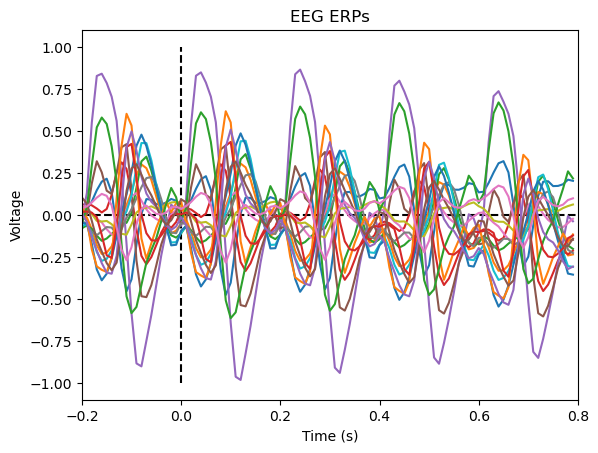

In [36]:
bio_data = THINGS_eeg_data['preprocessed_eeg_data']
times = THINGS_eeg_data['times']

# Average across repetitions
erp_data = np.mean(bio_data, 1)

# Average across img_cond
erp_data_all = np.mean(erp_data, 0)

plt.figure()
plt.plot([-.2, .8], [0, 0], 'k--', [0, 0], [-1, 1], 'k--')
plt.plot(times, np.transpose(erp_data_all))
plt.xlabel('Time (s)')
plt.xlim(left=-.2, right=.8)
plt.ylabel('Voltage')
# plt.ylim(bottom=-0.5, top=0.5)
plt.title('EEG ERPs')
plt.show()

## 3. Image classification
This section divide image concepts into two categories based on the object property selected. 

Available properties are printed, and the median value, number of positive and negative concepts are shown at the end. 

In [11]:
import statistics as st
import pandas as pd
import numpy 
import os

# load THINGS image metadata
img_meta_dir = os.path.join(project_dir, 'eeg_dataset', 'wake_data', 'THINGS', 'objectProperties_meanRatings.tsv')
img_data = pd.read_csv(img_meta_dir, delimiter='\t')
col_names = img_data.columns
print(col_names)
print('The number of concepts in original image meta data', len(img_data))

# Load THINGS training images
parent_dir = os.path.join('D:/', 'UG', 'Research', 'Dream_Neural_Decoding',
                           'THINGS_EEG','project_directory')
img_training_dir  = os.path.join(parent_dir, 'image_set', 'training_images')

concepts = os.listdir(img_training_dir)
concepts = [concept[6:] for concept in concepts]
print('The number of concepts in training data:', len(concepts))

img_data = img_data[img_data['uniqueID'].isin(concepts)]
print('The number of concepts in new image meta data', len(img_data))
img_data = img_data.reset_index()
img_data.index

Index(['Word', 'uniqueID', 'manmade_mean', 'manmade_SD', 'precious_mean',
       'precious_SD', 'lives_mean', 'lives_SD', 'heavy_mean', 'heavy_SD',
       'natural_mean', 'natural_SD', 'moves_mean', 'moves_SD', 'grasp_mean',
       'grasp_SD', 'hold_mean', 'hold_SD', 'be.moved_mean', 'be.moved_SD',
       'pleasant_mean', 'pleasant_SD', 'deprecatedArousing_mean',
       'deprecatedArousing_SD', 'N_ratings'],
      dtype='object')
The number of concepts in original image meta data 1854
The number of concepts in training data: 1654
The number of concepts in new image meta data 1654


RangeIndex(start=0, stop=1654, step=1)

# < Property dcoding >
1854 concepts are divided into 1654 concepts for training and 200 concepts for testing.

The logistic regression classification is done on either DEED dream epochs or THINGS test data. 

#### a. Initial parameters:

including the project directory and object property.

In [1]:
import os
import numpy as np
obj_prop = 'pleasant_mean'

#### b. functions

1. The function 'feature_select' divides THINGS training/test data into two classes. 

2. The function 'plot_result' plot the decoding result and corresponding image. 

In [2]:
def feature_select(sub, obj_prop, img_type, file):
    import statistics as st
    import pandas as pd
    import numpy as np
    import os
    
    ### Load data and concepts names ###
    if file == 'Shannon':
        project_dir = os.path.join('D:/', 'UG', 'Research', 'Dream_Neural_Decoding',
                           'Shannon_Big_Big_Dream_Project', 'project_directory')
        THINGS_dir = os.path.join(project_dir, 'eeg_dataset', 'wake_data', 'THINGS')
        img_dir  = os.path.join(THINGS_dir, 'image_set', img_type+'_images') 
    elif file == 'THINGS':
        project_dir = os.path.join('D:/', 'UG', 'Research', 'Dream_Neural_Decoding',
                           'THINGS_EEG', 'project_directory')
        THINGS_dir = os.path.join(project_dir, 'eeg_dataset')
        img_dir  = os.path.join(THINGS_dir, 'image_set', img_type+'_images')
    
    # load THINGS image metadata
    img_meta_dir = os.path.join(THINGS_dir, 'objectProperties_meanRatings.tsv')
    img_data = pd.read_csv(img_meta_dir, delimiter='\t')

    concepts_dir = os.listdir(img_dir)
    concepts = [concept[6:] for concept in concepts_dir]

    img_data = img_data[img_data['uniqueID'].isin(concepts)]
    img_data = img_data.reset_index()
    
    obj = list(img_data.loc[:, obj_prop].items())
    sorted_obj = sorted(obj, key=lambda x: x[1]) # Ascending order

    ### Select object property ###
    if img_type == 'training':
        posi_index = sorted_obj[-300:]
        nega_index = sorted_obj[:300]
    elif img_type == 'test':
        posi_index = sorted_obj[-50:]
        nega_index = sorted_obj[:50] 
    print(f'We select top / bottom, {len(posi_index)} / {len(nega_index)} images for {img_type}.')
  
    posi_index, nega_index = np.array(posi_index), np.array(nega_index)
            
    if img_type == 'training':
        No_p = posi_index.shape[0]*10
        No_n = nega_index.shape[0]*10
    elif img_type =='test':
        No_p = posi_index.shape[0]
        No_n = nega_index.shape[0]
        
    ### Load THINGS data ###
    THINGS_prepr_dir = os.path.join(THINGS_dir, 
                                    'preprocessed_data','sub-'+format(sub,'02'),
                                    'preprocessed_eeg_'+img_type+'.npy')
    THINGS_eeg_data = np.load(THINGS_prepr_dir, allow_pickle=True).item()
     
    # Notations
    repetitions = THINGS_eeg_data['preprocessed_eeg_data'].shape[1]
    channels = THINGS_eeg_data['preprocessed_eeg_data'].shape[2]
    times = THINGS_eeg_data['preprocessed_eeg_data'].shape[3]
    
    ### Select features and targets ###
    X_posi, X_nega, y_posi, y_nega = [],[],[],[]
    
    # Appending training features and targets:
    if img_type == 'training':
        for p in posi_index[:,0]: 
            for x in range(int(p*10),int(p*10+10)):
                for r in range(repetitions):
                    X_posi.append(THINGS_eeg_data['preprocessed_eeg_data'][x,r,:,:])
                    y_posi.append(1)
        for n in nega_index[:,0]: 
            for x in range(int(n*10),int(n*10+10)):
                for r in range(repetitions):
                    X_nega.append(THINGS_eeg_data['preprocessed_eeg_data'][x,r,:,:])
                    y_nega.append(0)               
    # Appending test features and targets:
    elif img_type =='test':
        for p in posi_index[:,0]: 
            for r in range(repetitions):
                X_posi.append(THINGS_eeg_data['preprocessed_eeg_data'][int(p),r,:,:])
                y_posi.append(1)
        for n in nega_index[:,0]: 
            for r in range(repetitions):
                X_nega.append(THINGS_eeg_data['preprocessed_eeg_data'][int(n),r,:,:])
                y_nega.append(0)
        
    # Combine both positive and negative features
    X_posi, X_nega, y_posi, y_nega = np.array(X_posi), np.array(X_nega), np.array(y_posi), np.array(y_nega)
    X = np.concatenate((X_posi, X_nega))
    y = np.concatenate((y_posi, y_nega))
        
    return X, y, posi_index, nega_index

In [3]:
def plot_result(project_dir, sub, test_img_idx, file):
    from PIL import Image
    from matplotlib import pyplot as plt
    
    ### Load data ###
    if file == 'Shannon':
        THINGS_dir = os.path.join(project_dir, 'eeg_dataset', 'wake_data', 'THINGS')
    elif file == 'THINGS':
        THINGS_dir = os.path.join(project_dir, 'eeg_dataset')

    THINGS_prepr_dir = os.path.join(THINGS_dir, 
                                    'preprocessed_data','sub-'+format(sub,'02'),
                                    'preprocessed_eeg_test.npy')
    eeg_data = np.load(THINGS_prepr_dir, allow_pickle=True).item()
    eeg_data_single_image = eeg_data['preprocessed_eeg_data'][test_img_idx]

    ### Plot the corresponding image ###
    if file == 'Shannon':
        img_dir  = os.path.join('D:/', 'UG', 'Research', 'Dream_Neural_Decoding','Shannon_Big_Big_Dream_Project',
                           'project_directory', 'eeg_dataset', 'wake_data', 'THINGS','image_set') # THINGS_EEG
    elif file == 'THINGS':
        img_dir  = os.path.join(THINGS_dir,'image_set')
        
    img_metadata = np.load(os.path.join(img_dir, 'image_metadata.npy'),allow_pickle=True).item()

    test_img_dir = os.path.join(img_dir, 'test_images',
        img_metadata['test_img_concepts'][test_img_idx],
        img_metadata['test_img_files'][test_img_idx])
    test_img = Image.open(test_img_dir).convert('RGB')

    plt.figure()
    plt.axis('off')
    plt.imshow(test_img)
    plt.title('Test image: ' + str(test_img_idx+1) + '\nImage concept: ' +\
        img_metadata['test_img_concepts'][test_img_idx] + '\nImage file: ' +\
        img_metadata['test_img_files'][test_img_idx]);
    
    return eeg_data_single_image

## 1. THINGS Training 

I am going to apply feature_selection on training data and then plot the learning curve at an arbitrary time point.

### 1). Select training features X and targets Y from training data

In [35]:
X_1, Y_1, _, _ = feature_select(1, obj_prop, 'training', 'THINGS')
X_2, Y_2, _, _ = feature_select(2, obj_prop, 'training', 'THINGS')
X_3, Y_3, _, _ = feature_select(3, obj_prop, 'training', 'THINGS')

X = np.concatenate((X_1, X_2, X_3), axis=0)
Y = np.concatenate((Y_1, Y_2, Y_3), axis=0)

print('The shape of training features X:', X.shape)
print('The shape of training targets y:',Y.shape)

We select top / bottom, 300 / 300 images for training.
We select top / bottom, 300 / 300 images for training.
We select top / bottom, 300 / 300 images for training.
The shape of training features X: (72000, 17, 100)
The shape of training targets y: (72000,)


In [40]:
# Shuffled X and Y
train_idx = np.arange(X.shape[0])  
np.random.shuffle(train_idx) 

X_shuffled = X[train_idx]
Y_shuffled = Y[train_idx]

### 2). Plot learning curve of classifier at arbitrary time

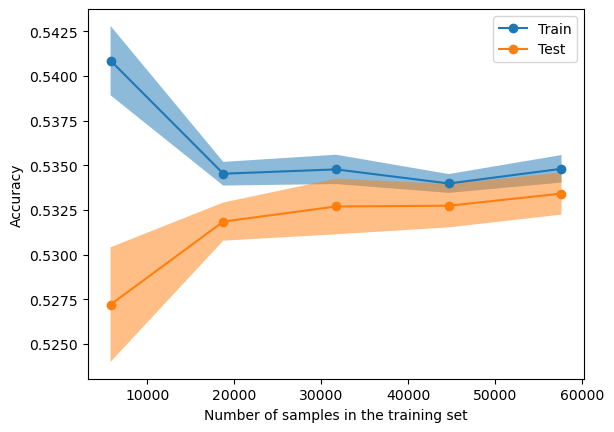

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import learning_curve
from sklearn.model_selection import LearningCurveDisplay

rand_t_idx = 41
logreg = LogisticRegression().fit(X_shuffled[:,:,rand_t_idx], Y_shuffled)

common_params = {
"X": X_shuffled[:,:,rand_t_idx],
"y": Y_shuffled,
"train_sizes": np.linspace(0.1, 1.0, 5),
"cv": 5,
"score_type": "both",
"n_jobs": -1,
"line_kw": {"marker": "o"},
"std_display_style": "fill_between",
"score_name": "Accuracy",}
LearningCurveDisplay.from_estimator(logreg, **common_params)

del rand_t_idx

## 2. THINGS test

I am going to apply feasure_selection on my test data in order to divide my THINGS data into two classes. 

And then I did the binary property decoding through all the time. I used sub-1 training EEG data as training X, and sub-1 test EEG data as test X.

Finally I selected the time point with highest accuracy and plot the single-time decoding result.

In [44]:
Xtest, Ytest, posi_idx, nega_idx = feature_select(4, obj_prop, 'test', 'THINGS')
print('The shape od X_test:', Xtest.shape)
print('The shape od y_test:', Ytest.shape)

# Notations
test_conds =  Xtest.shape[0]
test_channels = Xtest.shape[1]
test_times = Xtest.shape[2]

We select top / bottom, 50 / 50 images for test.
The shape od X_test: (8000, 17, 100)
The shape od y_test: (8000,)


In [45]:
# Shuffled Xtest and Ytest
test_idx = np.arange(Xtest.shape[0])  
np.random.shuffle(test_idx) 

Xtest_shuffled = Xtest[test_idx]
Ytest_shuffled = Ytest[test_idx]

### 1). Plot all temporal decoding result

In [88]:
# # plot the result
# plt.figure()
# for c in range(test_cond):
#     label = 'positive' if Ytest_1[c] == 1 else 'negative' # pick pleasant or unpleasant label based on sample
#     color = "green" if label == "positive" else "purple"
#     plt.plot(range(37,41), result[c][37:41], color=color, alpha=0.05) 
# plt.xlabel('Time (10ms)')
# plt.ylabel('Probability of being positive')
# plt.title(obj_prop)
# plt.show()

In [10]:
from sklearn.linear_model import LogisticRegression
from tqdm import tqdm
import matplotlib.pyplot as plt

In [48]:
Ytest_pred_prob = np.empty((test_conds, test_times))
Ytest_pred = np.empty((test_conds, test_times))
binary_results = np.empty((test_times))
accuracy = np.empty((test_conds, test_times))

for T_idx in tqdm(range(test_times), desc=f'{obj_prop} decoding training'):
    logreg = LogisticRegression().fit(X_shuffled[:,:,T_idx], Y_shuffled)
    for c in range(test_conds):
        Ytest_pred_prob[c][T_idx] = logreg.predict_proba(Xtest_shuffled[c,:,T_idx].reshape(1,-1))[0][1]
        Ytest_pred[c][T_idx] = logreg.predict(Xtest_shuffled[c,:,T_idx].reshape(1,-1))
    binary_results[T_idx] = sum(Ytest_pred[:,T_idx] == Ytest_shuffled) / len(Ytest_shuffled)
    accuracy[:,T_idx] =  (Ytest_pred[:,T_idx] == Ytest_shuffled).astype(int)
    del logreg

pleasant_mean decoding training: 100%|███████████████████████████████████████████████| 100/100 [02:50<00:00,  1.71s/it]


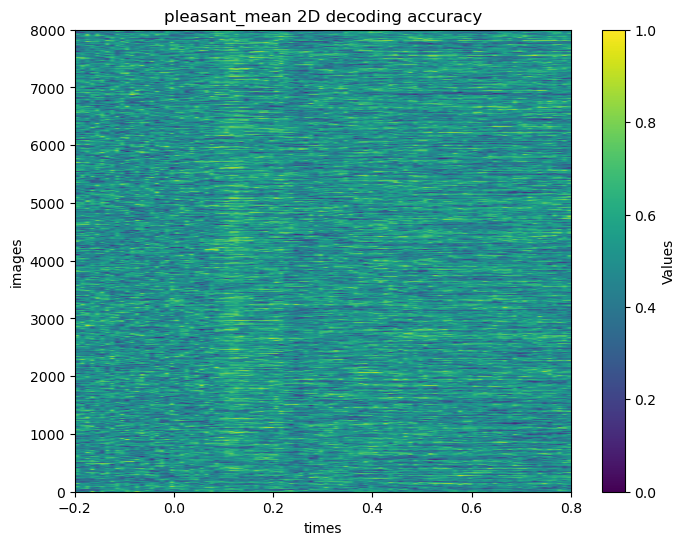

In [49]:
# Create the plot
plt.figure(figsize=(8, 6))
plt.imshow(accuracy, cmap='viridis',extent=[-.2, .8, 0, 8000], 
           origin='lower', aspect='auto')

# Add colorbar
cbar = plt.colorbar()
cbar.set_label('Values')

# Add labels and title
plt.xlabel('times')
plt.ylabel('images')
plt.title(f'{obj_prop} 2D decoding accuracy')
plt.show()

### 2). Plot single temporal decoding result

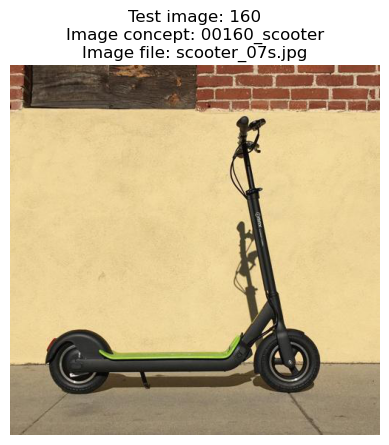

In [27]:
idx = 0 # 0:49
img_idx = int(posi_idx[idx][0])
idx_test_data = plot_result(project_dir,1,img_idx,'THINGS')

pleasant_mean decoding training: 100%|███████████████████████████████████████████████| 100/100 [00:05<00:00, 17.85it/s]


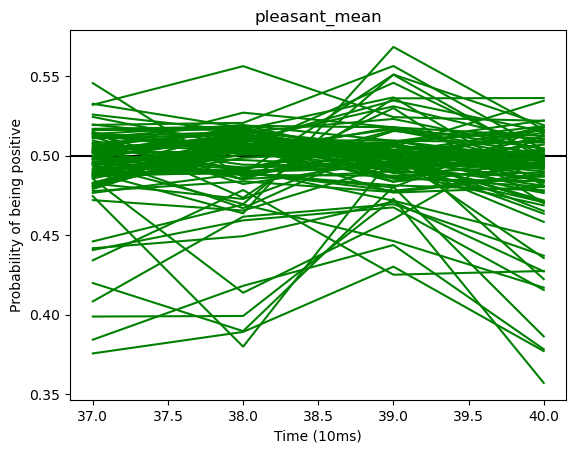

In [28]:
reps = 80
sing_result = np.empty((reps, test_times))

plt.figure()
plt.axhline(y=0.5,color='k')
for T in tqdm(range(test_times), desc=f'{obj_prop} decoding training'):
    logreg = LogisticRegression().fit(X[:,:,T], Y)
    for i in range(reps):
        sing_result[i][T] = logreg.predict_proba(Xtest_1[idx*80+i,:,T].reshape(1,-1))[0][1]
    del logreg
label = 'positive' if Ytest_1[idx] == 1 else 'negative' # pick pleasant or unpleasant label based on sample
color = "green" if label == "positive" else "purple"
plt.plot(range(37,41), sing_result[37:41], color=color)
plt.xlabel('Time (10ms)')
plt.ylabel('Probability of being positive')
plt.title(obj_prop)
plt.show()

### 3). Permunation scores

The permutation scores all calculated through all the time. I used sub-1 test EEG data to do the permuatations.

The temporal permutation test scores and the hitogram of permutations at single-time are plotted.

In [50]:
n_perm = 100

#### a. Temporal permutation test scores

Plot the permutation test scores over all time courses.

In [51]:
from sklearn.model_selection import permutation_test_score

scores, perm_means, perm_stds = np.empty((test_times)), np.empty((test_times)), np.empty((test_times))
perm_scores = np.empty((test_times, n_perm))

for T_idx in tqdm(range(test_times), desc='permutations with time'):
    logreg = LogisticRegression().fit(X_shuffled[:,:,T_idx],Y_shuffled)
    scores[T_idx], perm_scores[T_idx], _ = permutation_test_score(logreg, 
                                                          Xtest_shuffled[:,:,T_idx], Ytest_shuffled, scoring="accuracy", 
                                                          cv=5, n_permutations=n_perm, n_jobs=-1)
    perm_means[T_idx] = np.mean(perm_scores[T_idx])
    perm_stds[T_idx] = np.std(perm_scores[T_idx])
    del logreg

permutations with time: 100%|████████████████████████████████████████████████████████| 100/100 [04:28<00:00,  2.68s/it]


In [52]:
# Get real time instead of time idx
sub = 4
project_dir = os.path.join('D:/', 'UG', 'Research', 'Dream_Neural_Decoding',
                           'THINGS_EEG',
                           'project_directory')
data_dir = os.path.join(project_dir, 'eeg_dataset','preprocessed_data', 
                        'sub-'+format(sub,'02'), 'preprocessed_eeg_test.npy')

data = np.load(data_dir, allow_pickle=True).item()
times = data['times']
del data, sub

The time with greatest score difference: 0.12s


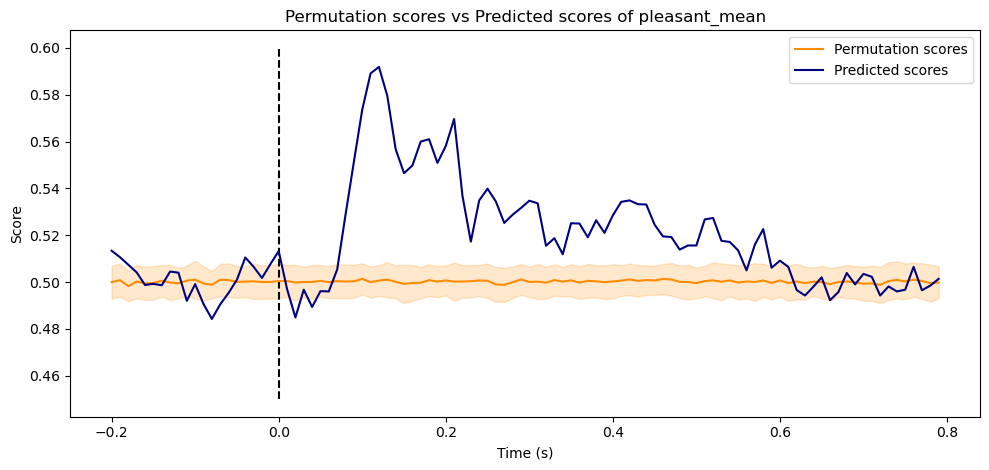

In [53]:
fig, ax = plt.subplots(1)
ax.set_title(f"Permutation scores vs Predicted scores of {obj_prop}")
ax.set(xlabel = 'Time (s)', ylabel = "Score")
ax.plot([0, 0], [.45, .6], 'k--')
ax.plot(times, perm_means, label = "Permutation scores", color="darkorange")
ax.fill_between(times, perm_means - perm_stds, perm_means + perm_stds, alpha=0.2, color="darkorange")
ax.plot(times, scores, label = "Predicted scores", color="navy")
ax.legend(loc = 'best')
fig.set_figwidth(10)
fig.tight_layout()

max_time_idx = np.argmax(scores)
print(f'The time with greatest score difference: {round(times[max_time_idx],2)}s')

The time with greatest score difference: 0.12s


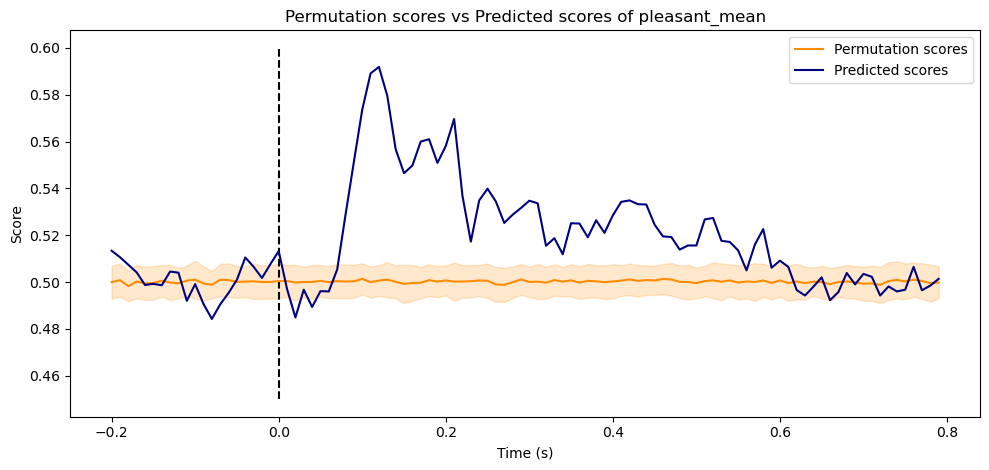

In [53]:
fig, ax = plt.subplots(1)
ax.set_title(f"Permutation scores vs Predicted scores of {obj_prop}")
ax.set(xlabel = 'Time (s)', ylabel = "Score")
ax.plot([0, 0], [.45, .6], 'k--')
ax.plot(times, perm_means, label = "Permutation scores", color="darkorange")
ax.fill_between(times, perm_means - perm_stds, perm_means + perm_stds, alpha=0.2, color="darkorange")
ax.plot(times, scores, label = "Predicted scores", color="navy")
ax.legend(loc = 'best')
fig.set_figwidth(10)
fig.tight_layout()

max_time_idx = np.argmax(scores)
print(f'The time with greatest score difference: {round(times[max_time_idx],2)}s')

#### b. Permutation test score at a single time point

Look into more details, and plot the histogram of permutation scores at a single time point.

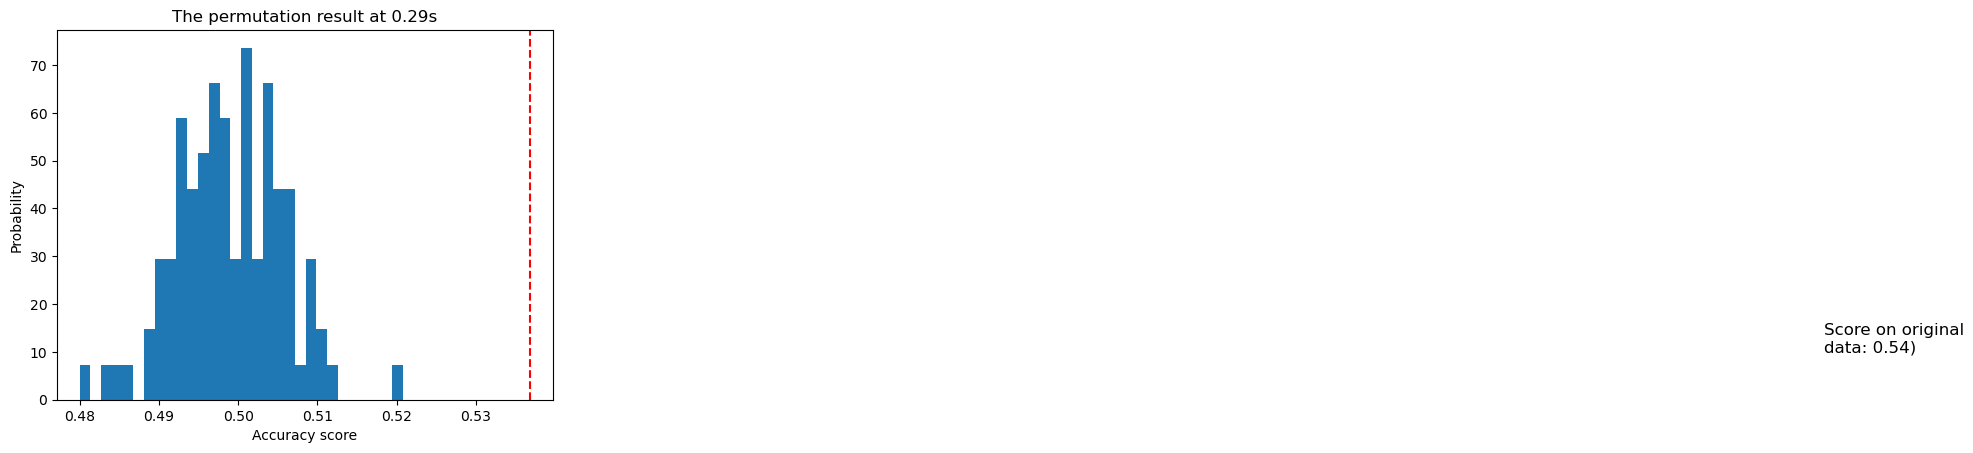

In [143]:
# Plot the chance level
fig, ax = plt.subplots()
ax.set_title(f'The permutation result at {round(times[max_time_idx],2)}s')
ax.hist(perm_scores[max_time_idx], bins=30, density=True)
ax.axvline(scores[max_time_idx], ls="--", color="r")
score_label = f"Score on original\ndata: {scores[max_time_idx]:.2f})"
ax.text(0.7, 10, score_label, fontsize=12)
ax.set_xlabel("Accuracy score")
_ = ax.set_ylabel("Probability")

## 3. DEED

In [7]:
project_dir = os.path.join('D:/', 'UG', 'Research', 'Dream_Neural_Decoding',
                           'Shannon_Big_Big_Dream_Project', 'project_directory')
test_prepr_dir = os.path.join(project_dir, 'eeg_dataset','dream_data', 'DEED', 'preprocessed_data', '295', '295_1.npy')
eeg_data_test = np.load(test_prepr_dir, allow_pickle=True).item()

# Notations
X_dream = eeg_data_test['preprocessed_eeg_data']
dream_num_channels = eeg_data_test['preprocessed_eeg_data'].shape[0]
dream_num_times = eeg_data_test['preprocessed_eeg_data'].shape[1]

raw_time = 80
dream_times = eeg_data_test['times']
dream_result = np.empty((raw_time))
dream_mean_result = np.empty((dream_num_times-raw_time))

moves_mean predicting: 100%|█████████████████████████████████████████████████████████| 200/200 [08:23<00:00,  2.52s/it]


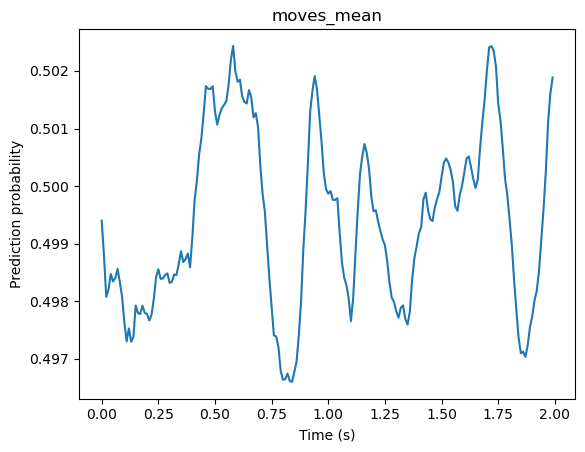

In [8]:
for T in tqdm(range(280-raw_time), desc=f'{obj_prop} predicting'):
    for T_idx in range(raw_time):
        logreg = LogisticRegression().fit(X[:,:,T_idx+20], Y)
        dream_result[T_idx] = logreg.predict_proba(X_dream[:,T+T_idx].reshape((1,dream_num_channels)))[0][1]
    dream_mean_result[T] = np.mean(dream_result)

# plot the result
plt.figure()
plt.plot(dream_times[:200], dream_mean_result[:200])
plt.xlabel('Time (s)')
plt.ylabel('Prediction probability')
plt.title(obj_prop)
plt.show()

# < Pairwise decoding >

1. First we visualized the mean ERPs of sub-1 and sub-2 over repetitions and image conditions.

2. Then we did pairwise decoding: training sub-1 test EEG(X) and testing on sub-2 test EEG.

3. Last we did encoding model classification: training DNN feature maps(X) and sub-1 training EEG(Y), and testing on either sub-1 test EEG or sub-2 test EEG.

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

## 1. Visualize ERPs

### 1). EEG proprocessed test data of THINGS (17 channels)

#### Load

In [2]:
project_dir = os.path.join('D:/', 'UG', 'Research', 'Dream_Neural_Decoding',
                           'THINGS_EEG',
                           'project_directory')
sub = 1

In [3]:
data_dir_1 = os.path.join('eeg_dataset',
                        #'wake_data','THINGS',
                        'preprocessed_data', 'sub-'+
                        format(sub,'02'), 'preprocessed_eeg_test.npy')

bio_data = np.load(os.path.join(project_dir, data_dir_1), allow_pickle=True).item()
bio_test_1 = bio_data['preprocessed_eeg_data']

In [4]:
times = bio_data['times'] # The list of time courses
ch_names = bio_data['ch_names'] # The list of channel names

del data_dir_1, bio_data

In [5]:
data_dir_2 = os.path.join('eeg_dataset',
                       # 'wake_data','THINGS',
                        'preprocessed_data', 'sub-'+
                        format(sub+1,'02'), 'preprocessed_eeg_test.npy')

bio_data = np.load(os.path.join(project_dir, data_dir_2), allow_pickle=True).item()
bio_test_2 = bio_data['preprocessed_eeg_data']

del data_dir_2, bio_data

In [6]:
del project_dir, sub

In [7]:
print('\nBio test EEG data of sub-1 shape:')
print(bio_test_1.shape)
print('(Test image conditions × repetitions x channels x times)')

print('\nBio test EEG data of sub-2 shape:')
print(bio_test_2.shape)
print('(Test image conditions × repetitions x channels x times)')
print('')
print('The channels:')
print(ch_names)
del ch_names


Bio test EEG data of sub-1 shape:
(200, 80, 17, 100)
(Test image conditions × repetitions x channels x times)

Bio test EEG data of sub-2 shape:
(200, 80, 17, 100)
(Test image conditions × repetitions x channels x times)

The channels:
['Pz', 'P3', 'P7', 'O1', 'Oz', 'O2', 'P4', 'P8', 'P1', 'P5', 'PO7', 'PO3', 'POz', 'PO4', 'PO8', 'P6', 'P2']


#### ERPs

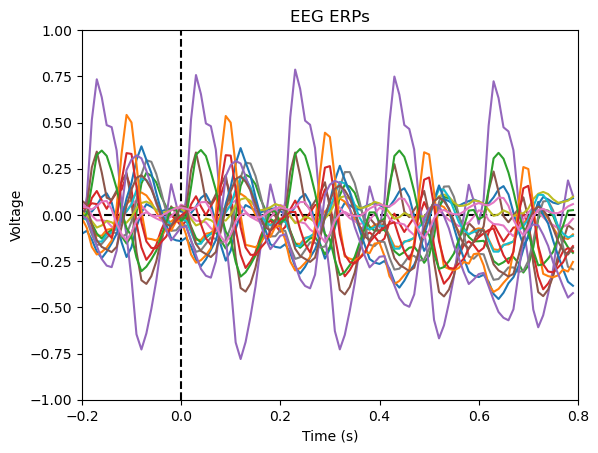

In [8]:
# Average across repetitions
erp_data_1 = np.mean(bio_test_1, 1)
erp_data_2 = np.mean(bio_test_2, 1)
# Average across img_cond
erp_data_all = np.mean(np.append(erp_data_1, erp_data_2, 0), 0)

plt.figure()
plt.plot([-.2, .8], [0, 0], 'k--', [0, 0], [-1, 1], 'k--')
plt.plot(times, np.transpose(erp_data_all));
plt.xlabel('Time (s)');
plt.xlim(left=-.2, right=.8)
plt.ylabel('Voltage');
plt.ylim(bottom=-1, top=1)
plt.title('EEG ERPs');

In [9]:
del erp_data_1, erp_data_2, times, erp_data_all

### 2). EEG proprocessed test data of THINGS (6 channels)

#### Load

In [17]:
project_dir = os.path.join('D:/', 'UG', 'Research', 'Dream_Neural_Decoding',
                           'Shannon_Big_Big_Dream_Project',
                           'project_directory')
sub = 1

In [18]:
data_dir_1 = os.path.join('eeg_dataset',
                        'wake_data','THINGS',
                        'preprocessed_data', 'sub-'+
                        format(sub,'02'), 'preprocessed_eeg_test.npy')

bio_data = np.load(os.path.join(project_dir, data_dir_1), allow_pickle=True).item()
bio_test_1 = bio_data['preprocessed_eeg_data']

In [19]:
times = bio_data['times'] # The list of time courses
ch_names = bio_data['ch_names'] # The list of channel names

del data_dir_1, bio_data

In [21]:
data_dir_2 = os.path.join('eeg_dataset',
                       'wake_data','THINGS',
                        'preprocessed_data', 'sub-'+
                        format(sub+1,'02'), 'preprocessed_eeg_test.npy')

bio_data = np.load(os.path.join(project_dir, data_dir_2), allow_pickle=True).item()
bio_test_2 = bio_data['preprocessed_eeg_data']

del data_dir_2, bio_data

In [22]:
del project_dir, sub

In [23]:
print('\nBio test EEG data of sub-1 shape:')
print(bio_test_1.shape)
print('(Test image conditions × repetitions x channels x times)')

print('\nBio test EEG data of sub-2 shape:')
print(bio_test_2.shape)
print('(Test image conditions × repetitions x channels x times)')
print('')
print('The channels:')
print(ch_names)
del ch_names


Bio test EEG data of sub-1 shape:
(200, 80, 6, 100)
(Test image conditions × repetitions x channels x times)

Bio test EEG data of sub-2 shape:
(200, 80, 6, 100)
(Test image conditions × repetitions x channels x times)

The channels:
['F3', 'T7', 'T8', 'F4', 'FT7', 'FT8']


#### ERPs

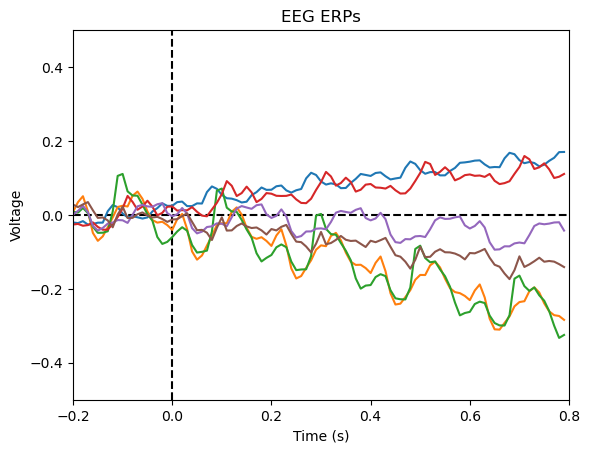

In [24]:
# Average across repetitions
erp_data_1 = np.mean(bio_test_1, 1)
erp_data_2 = np.mean(bio_test_2, 1)
# Average across img_cond
erp_data_all = np.mean(np.append(erp_data_1, erp_data_2, 0), 0)

plt.figure()
plt.plot([-.2, .8], [0, 0], 'k--', [0, 0], [-0.5, 0.5], 'k--')
plt.plot(times, np.transpose(erp_data_all));
plt.xlabel('Time (s)');
plt.xlim(left=-.2, right=.8)
plt.ylabel('Voltage');
plt.ylim(bottom=-0.5, top=0.5)
plt.title('EEG ERPs');

In [25]:
del erp_data_1, erp_data_2, times, erp_data_all

## 2. Pairwise decoding

In [27]:
project_dir = os.path.join('D:/', 'UG', 'Research', 'Dream_Neural_Decoding',
                           'Shannon_Big_Big_Dream_Project',
                           'project_directory')
sub = 1
n_iter = 1

# Import the 1st THINGS prepr bio test data
data_dir_1 = os.path.join('eeg_dataset',
                        'wake_data','THINGS',
                        'preprocessed_data', 'sub-'+
                        format(sub,'02'), 'preprocessed_eeg_test.npy')

bio_data = np.load(os.path.join(project_dir, data_dir_1), allow_pickle=True).item()
bio_test_1 = bio_data['preprocessed_eeg_data']
del bio_data

# Import the 2nd THINGS prepr bio test data
data_dir_2 = os.path.join('eeg_dataset',
                       'wake_data','THINGS',
                        'preprocessed_data', 'sub-'+
                        format(sub+1,'02'), 'preprocessed_eeg_test.npy')

bio_data = np.load(os.path.join(project_dir, data_dir_2), allow_pickle=True).item()
bio_test_2 = bio_data['preprocessed_eeg_data']

times = bio_data['times'] # The list of time courses
ch_names = bio_data['ch_names'] # The list of channel names
del bio_data

In [28]:
# =============================================================================
# Compute the pairwise decoding and noise ceiling
# =============================================================================
# Results and noise ceiling matrices of shape:
# (Iterations × Image conditions × Image conditions × EEG time points)
#
# 1. pair_dec
# 2. noise_ceiling_low
# 3. noise_ceiling_up
#

img_cond = bio_test_1.shape[0]
rep = bio_test_1.shape[1]
channels = len(ch_names)
time = len(times)

pair_dec  = np.zeros((n_iter, img_cond, img_cond, time))
noise_ceiling_low = np.zeros((n_iter, img_cond, img_cond, time))
noise_ceiling_up = np.zeros((n_iter, img_cond, img_cond, time))

# Average across all the biological data repetitions for the noise ceiling
# upper bound calculation
bio_data_avg_all = np.mean(bio_test_1, 1)

# X_test will be the synthesed EEG data (averaged over repetitions
bio_mean_test_2 = np.mean(bio_test_2, 1)

print('\nBio mean test EEG data of sub-2 shape:')
print(bio_mean_test_2.shape)
print('(Test image conditions × repetitions x channels x times)')


Bio mean test EEG data of sub-2 shape:
(200, 6, 100)
(Test image conditions × repetitions x channels x times)


In [29]:
from tqdm import tqdm
from sklearn.utils import resample
from sklearn.svm import SVC



# Random data repetitions index
shuffle_idx = resample(np.arange(0, rep), replace=False, n_samples=int(rep/2)) # See notebook!!!



# Select one half (40) of the biological data repetitions for training the
# classifier, and average them into 10 pseudo-trials of 4 repetitions
#
# This part excludes shuffle_idx!!!
#
ptrial_rep = 4
ptrail_num = int((rep/2) / ptrial_rep) # = 10 

bio_data_avg_half_1 = np.zeros((img_cond, ptrail_num, channels, time))
# shape (200, 10, 6, 100)

bio_data_provv = np.delete(bio_test_1, shuffle_idx, 1) # See notebook!!!
# shape (200, 40, 6, 100)

for r in range(ptrail_num): # r = 0,1,...,8,9
    bio_data_avg_half_1[:,r] = np.mean(
        bio_data_provv[:,r*ptrial_rep:r*ptrial_rep+ptrial_rep], 1)
del bio_data_provv
# This tells, we average the repetition 
# from idx_0 to idx_3,---> bio_data_avg_half_1[:,0,:,:] 
# from idx_4 to idx_7,---> bio_data_avg_half_1[:,1,:,:] 
# ...
# from idx_36 to idx_39,---> bio_data_avg_half_1[:,9,:,:] 



# Average across the other half of the biological data repetitions for the
# noise ceiling lower bound calculation
#
# This part includes shuffle_idx!!!
#
bio_data_avg_half_2 = np.mean(bio_test_1[:,shuffle_idx], 1) # averaged across 40 repetitions
# shape (200, 6, 100)



### Classifier target vectors ###
y_train = np.zeros((ptrail_num)*2) # = 20
y_train[ptrail_num:(ptrail_num)*2] = 1 
# The first 10 elements of y_train = 0
# The last 10 elements of y_train = 1

y_test = np.asarray((0, 1))

### 1). Single pairwise decoding at a specific time

In [35]:
#Select a specific image condition and time point
i1, i2, t_idx = 0, 1, 20

The decoding accuracy between i1=0, i2=1 at t = 0.0s is: 0.5



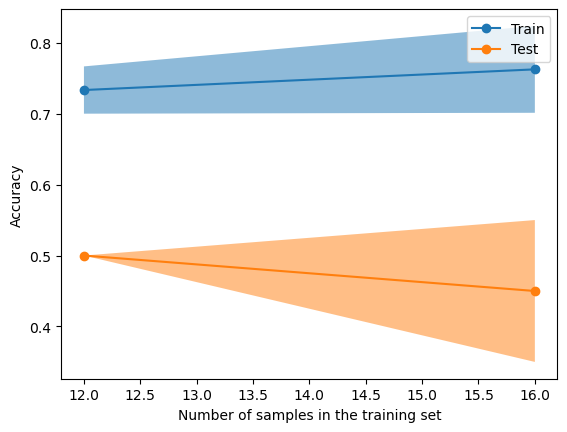

In [36]:
X_train = np.append(bio_data_avg_half_1[i1,:,:,t_idx],
                    bio_data_avg_half_1[i2,:,:,t_idx], 0)
dec_svm = SVC(kernel="linear")
dec_svm.fit(X_train, y_train)

X_test = np.append(np.expand_dims(bio_mean_test_2[i1,:,t_idx], 0), 
                np.expand_dims(bio_mean_test_2[i2,:,t_idx], 0), 0)

y_pred = dec_svm.predict(X_test)
pair_dec[0,i2,i1,t_idx] = sum(y_pred == y_test) / len(y_test)
print(f'The decoding accuracy between i1=0, i2=1 at t = {round(times[t_idx],2)}s is:', pair_dec[0,i2,i1,t_idx])
print('')

from sklearn.model_selection import learning_curve
from sklearn.model_selection import LearningCurveDisplay

X_train = np.append(bio_data_avg_half_1[i1,:,:,t_idx], bio_data_avg_half_1[i2,:,:,t_idx], 0)

common_params = {
"X": X_train,
"y": y_train,
"train_sizes": np.linspace(0.1, 1.0, 5),
"cv": 5,
"score_type": "both",
"n_jobs": -1,
"line_kw": {"marker": "o"},
"std_display_style": "fill_between",
"score_name": "Accuracy",}
LearningCurveDisplay.from_estimator(dec_svm, **common_params)

del i1, i2, t_idx, X_train

### 2). Total pairwise decoding at all times

In [38]:
### Loop over image-conditions and EEG time points ###
for i1 in tqdm(range(img_cond)):
    for i2 in range(img_cond):
        if i1 < i2:
            for t_idx in range(time):
                # Train the classifier
                X_train = np.append(bio_data_avg_half_1[i1,:,:,t_idx],
                    bio_data_avg_half_1[i2,:,:,t_idx], 0) # X_train (1,20,17,1)
                dec_svm = SVC(kernel="linear")
                dec_svm.fit(X_train, y_train) # y_train (20,): [0,...0,1,...1]

                # Test the classifier on the synthetic data
                X_test = np.append(
                    np.expand_dims(bio_mean_test_2[i1,:,t_idx], 0), 
                    np.expand_dims(bio_mean_test_2[i2,:,t_idx], 0), 0)
                # X_test_synt appends two arrays with shape (1,channels)

                y_pred = dec_svm.predict(X_test)
                pair_dec[0,i2,i1,t_idx] = sum(y_pred == y_test) / len(y_test)
                # This is the pairwise decoding accuracy

                # Compute the noise ceiling
                X_test_avg_half = np.append(np.expand_dims(
                    bio_data_avg_half_2[i1,:,t_idx], 0), np.expand_dims(
                    bio_data_avg_half_2[i2,:,t_idx], 0), 0)
                X_test_avg_all = np.append(np.expand_dims(
                    bio_data_avg_all[i1,:,t_idx], 0), np.expand_dims(
                    bio_data_avg_all[i2,:,t_idx], 0), 0)

                y_pred_noise_ceiling_low = dec_svm.predict(X_test_avg_half)
                y_pred_noise_ceiling_up = dec_svm.predict(X_test_avg_all)

                noise_ceiling_low[0,i2,i1,t_idx] = sum(
                    y_pred_noise_ceiling_low == y_test) / len(y_test)
                noise_ceiling_up[0,i2,i1,t_idx] = sum(
                    y_pred_noise_ceiling_up == y_test) / len(y_test)

  6%|█████▏                                                                         | 13/200 [07:02<1:41:15, 32.49s/it]


KeyboardInterrupt: 

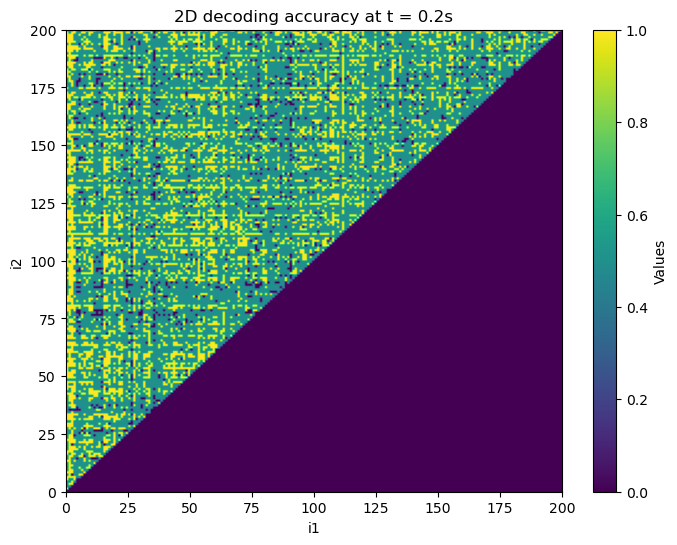

In [104]:
# Select the time point t=0
t_idx = 40
data = pair_dec[0, :, :, t_idx]

# # Create a meshgrid for i1 and i2 indices
# i1_indices = np.arange(img_cond)
# i2_indices = np.arange(img_cond)

# Create the plot
plt.figure(figsize=(8, 6))
plt.imshow(data, cmap='viridis', extent=[0, 200, 0, 200], origin='lower', aspect='auto')

# Add colorbar
cbar = plt.colorbar()
cbar.set_label('Values')

# Add labels and title
plt.xlabel('i1')
plt.ylabel('i2')
plt.title(f'2D decoding accuracy at t = {round(times[t_idx], 2)}s')

# Show the plot
plt.show()

In [105]:
# Extract elements where i1 < i2
i1_indices, i2_indices = np.tril_indices(200, -1)
filtered_data = data[i1_indices, i2_indices]

# Get unique values and their counts
unique_values, counts = np.unique(filtered_data, return_counts=True)

# Print the unique values and their counts
print(f'The number of 0, 0.5, 1 at t = {round(times[t_idx], 2)}s:')
for value, count in zip(unique_values, counts):
    print(f"Value: {value}, Count: {count}")

The number of 0, 0.5, 1 at t = 0.2s:
Value: 0.0, Count: 1131
Value: 0.5, Count: 13213
Value: 1.0, Count: 5556


This plot illustrates how the number of 0, 0,5, and 1 envolve with time:



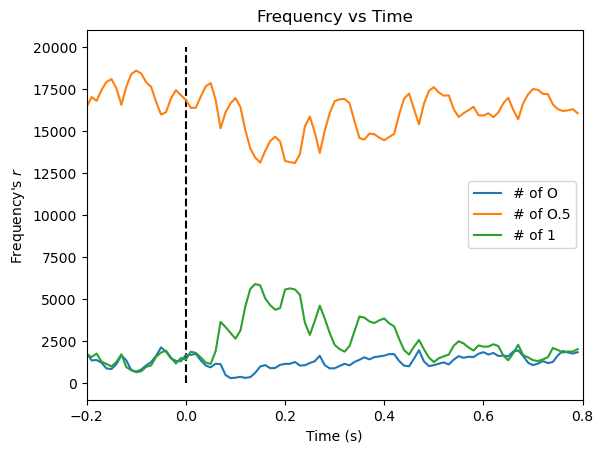

In [106]:
N_0, N_half, N_1 = [], [], []
for t in range(time):
    data = pair_dec[0, :, :, t]
    filtered_data = data[i1_indices, i2_indices]
    _, counts = np.unique(filtered_data, return_counts=True)
    
    N_0.append(counts[0])
    N_half.append(counts[1])
    N_1.append(counts[2])
    
print('This plot illustrates how the number of 0, 0,5, and 1 envolve with time:')
print('')
plt.figure()
plt.plot([0, 0], [-1, 20000], 'k--')
plt.plot(times, N_0, label='# of O');
plt.plot(times, N_half, label='# of O.5');
plt.plot(times, N_1, label='# of 1');
plt.xlabel('Time (s)');
plt.xlim(left=-.2, right=.8)
plt.ylabel('Frequency\'s $r$');
plt.legend()
plt.title('Frequency vs Time');

## 3. Encoding 

In [100]:
# Load dnn feature maps
dnn_parent_dir = os.path.join(project_dir, 'dnn_feature_maps',
    'pca_feature_maps', 'alexnet', 'pretrained-True', 'layers-all')
dnn_fmaps_train = np.load(os.path.join(dnn_parent_dir,
    'pca_feature_maps_training.npy'), allow_pickle=True).item()
dnn_fmaps_test = np.load(os.path.join(dnn_parent_dir,
    'pca_feature_maps_test.npy'), allow_pickle=True).item()

print('Training DNN feature maps shape:')
print(dnn_fmaps_train['all_layers'].shape)
print('(Training image conditions × DNN feature maps PCA components)')

print('\nTraining DNN feature maps shape:')
print(dnn_fmaps_test['all_layers'].shape)
print('(Test image conditions × DNN feature maps PCA components)')

Training DNN feature maps shape:
(16540, 3000)
(Training image conditions × DNN feature maps PCA components)

Training DNN feature maps shape:
(200, 3000)
(Test image conditions × DNN feature maps PCA components)


In [103]:
# Load bio training EEG data
training_dir = os.path.join(project_dir, 'eeg_dataset',
    'preprocessed_data', 'sub-01')
eeg_data_train = np.load(os.path.join(training_dir,
    'preprocessed_eeg_training.npy'), allow_pickle=True).item()
bio_train_1 = eeg_data_train['preprocessed_eeg_data']

In [110]:
from sklearn.linear_model import LinearRegression
from scipy.stats import pearsonr as corr

pred_eeg_data_test = np.zeros((img_cond,channels,time))

for t in tqdm(range(time), desc='Encoding training'):
    for c in range(channels):
        reg = LinearRegression().fit(dnn_fmaps_train['all_layers'][:,:100],
            np.mean(bio_train_1[:,:,c,t], 1))
        pred_eeg_data_test[:,c,t] = reg.predict(dnn_fmaps_test['all_layers'][:,:100])

Encoding training: 100%|█████████████████████████████████████████████████████████████| 100/100 [01:24<00:00,  1.18it/s]


#### sub-1 --> sub-1

In [114]:
encoding_accuracy_11 = np.zeros((channels,time))

for t in tqdm(range(time), desc='Correlation'):
    for c in range(channels):
        encoding_accuracy[c,t] = corr(pred_eeg_data_test[:,c,t], np.mean(bio_test_1[:,:,c,t], 1))[0]

Correlation: 100%|██████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 136.96it/s]


This is the encoding accuracy within the same subject: 
bio_train from sub-1, and bio_test from sub-1



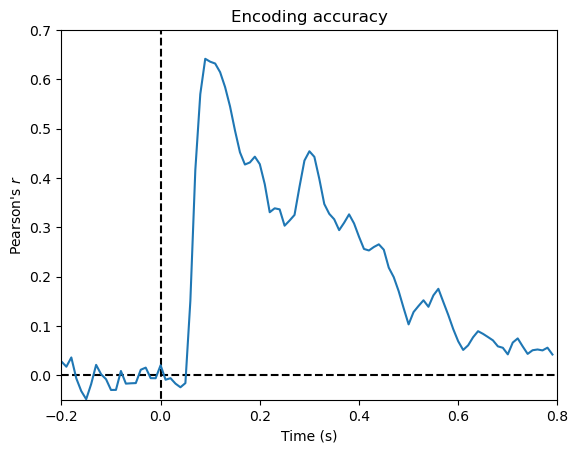

In [129]:
print('This is the encoding accuracy within the same subject: ')
print('bio_train from sub-1, and bio_test from sub-1')
print('')
plt.figure()
plt.plot([-.2, .8], [0, 0], 'k--', [0, 0], [-1, 1], 'k--')
plt.plot(times, np.mean(encoding_accuracy_11, 0));
plt.xlabel('Time (s)');
plt.xlim(left=-.2, right=.8)
plt.ylabel('Pearson\'s $r$');
plt.ylim(bottom=-.05, top=.7)
plt.title('Encoding accuracy');

#### sub-1 --> sub-2

In [131]:
encoding_accuracy_12 = np.zeros((channels,time))

for t in tqdm(range(time), desc='Correlation'):
    for c in range(channels):
        encoding_accuracy_12[c,t] = corr(pred_eeg_data_test[:,c,t], bio_mean_test_2[:,c,t])[0]

Correlation: 100%|██████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 921.42it/s]


This is the encoding accuracy between two subjects: 
bio_train from sub-1, and bio_test from sub-2



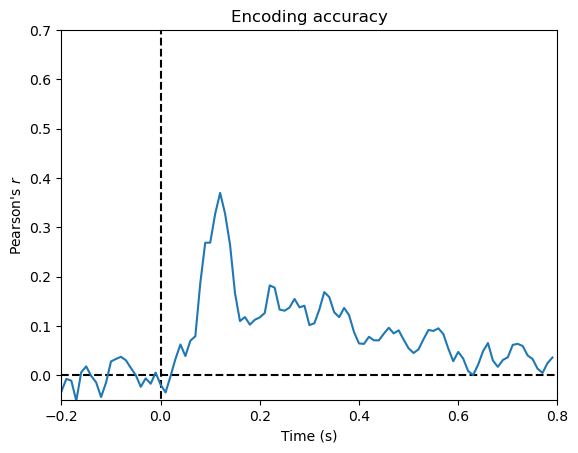

In [132]:
print('This is the encoding accuracy between two subjects: ')
print('bio_train from sub-1, and bio_test from sub-2')
print('')
plt.figure()
plt.plot([-.2, .8], [0, 0], 'k--', [0, 0], [-1, 1], 'k--')
plt.plot(times, np.mean(encoding_accuracy_12, 0));
plt.xlabel('Time (s)');
plt.xlim(left=-.2, right=.8)
plt.ylabel('Pearson\'s $r$');
plt.ylim(bottom=-.05, top=.7)
plt.title('Encoding accuracy');